## Troisième Partie : Modèle_Émission_CO2


### Importation des Packages

In [1]:
# Importation des librairies nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error


#### Modification des affichages de colonnes, lignes et largeurs de colonnes afin d'obtenir un maximum d'informations.

In [2]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes afin d'obtenir un maximum d'informations.
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_4126/847873684.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### Importation du dataframe

In [3]:
# On affiche le chemin menant à notre dataset.
data = pd.read_csv('data_clean.csv')

#On affiche les 5 premières lignes du DataFrame
data.head()

,DataYear,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,âge,Log2-SiteEnergyUseWN(kBtu)
0,2016,NonResidential,Mixed Use Property,820 4th Ave.,98104.0,7,DOWNTOWN,47.60515,-122.33159,1907.0,1.0,5.0,57452.0,0.0,57452.0,"Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall",Leisure,16442.0,Leisure,15505.0,NaN,7877219.00,273.02,109.0,22.909255
1,2016,NonResidential,Hotel/Senior Care/Housing,4242 ROOSEVELT WAY NE,98105.0,4,NORTHEAST,47.65959,-122.31755,2001.0,1.0,6.0,88592.0,30586.0,58006.0,"Hotel, Parking",Hotel/Senior Care/Housing,58006.0,Parking,30586.0,84.0,3673186.75,90.01,15.0,21.808601
2,2016,NonResidential,Hotel/Senior Care/Housing,1011 Pike ST,98101.0,7,EAST,47.61301,-122.32929,1991.0,1.0,8.0,158676.0,30301.0,128375.0,"Hotel, Parking, Retail Store, Swimming Pool",Hotel/Senior Care/Housing,112676.0,Parking,42000.0,NaN,5424942.00,256.57,25.0,22.371177
3,2016,NonResidential,Small- and Mid-Sized Office,5305 Shilshole Ave NW,98107.0,6,BALLARD,47.66587,-122.38476,1961.0,1.0,2.0,94900.0,0.0,94900.0,"Non-Refrigerated Warehouse, Office",Office,55586.0,Non-Refrigerated Warehouse,39314.0,57.0,6536359.50,130.56,55.0,22.640056
4,2016,NonResidential,Small- and Mid-Sized Office,2524 16th Ave S,98144.0,2,GREATER DUWAMISH,47.58034,-122.31132,1900.0,1.0,2.0,52554.0,0.0,52554.0,"Office, Other - Education",Office,51029.0,Education,7849.0,83.0,3150635.50,83.86,116.0,21.587212


In [4]:
# On affiche le type de variables du DataFrame
data.dtypes

DataYear                           int64  
BuildingType                       object 
PrimaryPropertyType                object 
Address                            object 
ZipCode                            float64
CouncilDistrictCode                int64  
Neighborhood                       object 
Latitude                           float64
Longitude                          float64
YearBuilt                          float64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                   float64
PropertyGFAParking                 float64
PropertyGFABuilding(s)             float64
ListOfAllPropertyUseTypes          object 
LargestPropertyUseType             object 
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ENERGYSTARScore                    float64
SiteEnergyUseWN(kBtu)              float64
TotalGHGEmissions                  float64
âge        

In [5]:
# On affiche la structure du DataFrame
data.shape

(1194, 25)

In [6]:
# Affichons le nombre de valeurs NaN de DataFrame
data.isna().sum().sum()

446

In [7]:
#sauvegarde séparée du energy star score
energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)

In [8]:
# On affiche la structure du DataFrame
data.shape

(1194, 24)

In [9]:
# Affichons le nombre de valeurs NaN de DataFrame
data.isna().sum().sum()

0

#### Préparation des vecteurs et matrices
- Séparation X et y

- En divisant le DataFrame data en X et y, on se prépare pour un modèle d'apprentissage automatique où X est utilisé comme jeu de données d'entraînement pour les variables prédictives et y est utilisé comme jeu de données d'entraînement pour la variable à prédire. 

In [10]:
y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_4126/4289038901.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]


#### Normalisation & One Hot Encoder


- On sélectionne les colonnes de type 'category' ou 'object' du DataFrame X, puis pour chacune de ces colonnes, il renvoie le nombre d'éléments uniques (ou le nombre de catégories différentes) qu'elle contient. Cela peut être utile pour comprendre la diversité des données dans ces colonnes, par exemple, pour identifier des colonnes qui peuvent nécessiter un encodage catégorique avant d'être utilisées dans un modèle d'apprentissage automatique.

In [11]:
X.select_dtypes(['category','object']).nunique()

BuildingType                    7   
PrimaryPropertyType             18  
Address                         1191
Neighborhood                    18  
ListOfAllPropertyUseTypes       247 
LargestPropertyUseType          14  
SecondLargestPropertyUseType    20  
dtype: int64

In [12]:
# On affiche la structure de X
X.shape

(1194, 21)

On sépare les colonnes du DataFrame X en deux groupes distincts : les colonnes catégoriques et les colonnes numériques. Cette séparation est effectuée en fonction du type de données de chaque colonne.

In [13]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

In [14]:
categorical_columns

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType'],
      dtype='object')

On effectue la standardisation des variables numériques et l'encodage one-hot des variables catégorielles, puis fusionne les résultats pour former un nouveau DataFrame avec les données prétraitées

In [15]:
#Importer les modules nécessaires :
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Initialiser un objet OneHotEncoder (ohe) et un objet StandardScaler (ss) :
ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()

# Normaliser les colonnes numériques à l’aide de l’écran StandardScaler :
X[numerical_columns] = ss.fit_transform(X[numerical_columns])

#Ajuster et transformer les colonnes catégoriques à l’aide de OneHotEncoder :
ohe.fit_transform(X[categorical_columns])

#Fusionner les colonnes numériques pré-traitées et les colonnes catégoriques codées à chaud en une seule DataFrame 
X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names_out().tolist(),
              data = ohe.fit_transform(X[categorical_columns])),
        left_index = True, right_index = True)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- Les catégories sorties du codage one-hot sont transformées en types de données appropriés.

On parcourt les colonnes du DataFrame X et recherche celles dont les noms correspondent à un motif spécifique 'x\d_'. Pour ces colonnes, il les convertit en un type de données entier de 32 bits. Cela pourrait être utile si les colonnes identifiées par ce motif devraient normalement être des entiers, mais étaient initialement enregistrées sous forme de chaînes de caractères ou d'autres types de données. La transformation permet de s'assurer que les données sont correctement représentées comme des entiers.

In [16]:
import re
regex = re.compile(r'x\d_')
for column in X.columns:
    if regex.search(column):
        X[column] = X[column].astype('int32')

In [17]:
X.sample(5)

,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,âge,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Education,PrimaryPropertyType_Health,PrimaryPropertyType_Hotel/Senior Care/Housing,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Leisure,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Retail,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Warehouse,Address_100 6th Ave S,Address_100 NE Northlake Way,Address_100 West Harrison,Address_100 West Highland Drive,Address_1000 1st Ave W,Address_1000 1st Ave.,Address_1000 4TH AVE S,Address_1000 Aurora Ave N,Address_1000 E Pike St,Address_1000 Minor Ave,Address_1000 NE 88th St,Address_1000 Queen Anne Ave N,Address_1000 S WELLER ST,Address_1001 2nd Ave W,Address_1001 Alaskan Way,Address_1001 Fairview Ave N,Address_10015 Lake City Way NE,Address_1002 AIRPORT WAY S,Address_1004 Belmont Ave E,Address_1005 E Roy St,Address_1007 First Ave.,Address_101 Elliott Ave West,Address_101 N 104th ST 98133,Address_101 Yesler Way,Address_101 west olympic place,Address_1010 8th Ave S,Address_1011 5th Avenue N,Address_1011 East Terrace Street,Address_1011 Pike ST,Address_1011 Western Ave,Address_1013 8th Ave,Address_1014 1st Ave S,Address_1015 3rd Ave,Address_1015 Second Avenue,Address_1017 W Nickerson St,Address_1017 minor Ave,Address_1018 1st Ave,Address_1020 E. Denny Way,Address_1020 NE 63rd St.,Address_1020 University St,Address_1026 NE 65th St,Address_1029 Summit Ave E,Address_103 1st Ave,Address_103 Bellevue Ave E,Address_10301 Greenwood Ave N,Address_10303 Meridian Ave N,Address_1032 S. Jackson,Address_104 17th Ave South,Address_1045 6th Avenue South,Address_105 5th Ave S,Address_105 South Main St.,Address_1050 w nickerson/1050 w Ewing st.,Address_10521 Meridian ave N,Address_10545 Greenwood Ave. North,Address_106 Bell St,Address_107 Cherry St,Address_107 Occidental Ave S,Address_10700 Meridian Ave North,Address_10735 Roosevelt Way NE,Address_10740 8th AVE NE,Address_10757 Greenwood Ave N,Address_108 5th Avenue S,Address_108 South Washington St,...,"ListOfAllPropertyUseTypes_Office, Other - Lodging/Residential","ListOfAllPropertyUseTypes_Office, Other - Public Services, Personal Services (Health/Beauty, Dry Cleaning, etc), Senior Care Community","ListOfAllPropertyUseTypes_Office, Other - Recreation","ListOfAllPropertyUseTypes_Office, Other - Restaurant/Bar","ListOfAllPropertyUseTypes_Office, Other - Restaurant/Bar, Parking, Retail Store","ListOfAllPropertyUseTypes_Office, Other - Services","ListOfAllPropertyUseTypes_Office, Other - Utility, Parking","ListOfAllPropertyUseTypes_Office, Other, Other - Entertainment/Public Assembly","ListOfAllPropertyUseTypes_Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall","ListOfAllPropertyUseTypes_Office, Other, Other - Restaurant/Bar, Strip Mall","ListOfAllPropertyUseTypes_Office, Other, Other - Services, Residence Hall/Dormitory, Restaurant","ListOfAllPropertyUseTypes_Office, Other, Parking","ListOfAllPropertyUseTypes_Office, Other, Parking, Retail Store","ListOfAllPropertyUseTypes_Office, Other, Refrigerated Warehouse","ListOfAllPropertyUseTypes_Office, Other, Retail Store","ListOfAllPropertyUseTypes_Office, Other, Worship Facility","ListOfAllPropertyUseTypes_Office, Parking","ListOfAllPropertyUseTypes_Office, Parking, Personal Services (Hea

- Infos sur X et y

In [18]:
X.shape

(1194, 1527)

In [19]:
y.shape

(1194, 3)

#### Séparation jeu de données
- Séparation test / train

- On divise les données contenues dans X et y['Log2-SiteEnergyUseWN(kBtu)'] en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test) en utilisant une proportion de 20% pour l'ensemble de test, tout en assurant la reproductibilité des résultats. Ces ensembles de formation et de test sont souvent utilisés pour entraîner et évaluer des modèles d'apprentissage automatique.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                        train_test_split(X, 
                                         y['Log2-SiteEnergyUseWN(kBtu)'],  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )

In [21]:
X_train.shape

(955, 1527)

In [22]:
X_test.shape

(239, 1527)

In [23]:
y_train.shape

(955,)

In [24]:
y_test.shape

(239,)

In [25]:
results = pd.DataFrame({})

On affiche le nombre total de valeurs manquantes dans chacun des ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test). Cela peut être utile pour vérifier la qualité des données et pour décider comment traiter les valeurs manquantes avant d'entraîner un modèle d'apprentissage automatique. Des valeurs manquantes importantes peuvent avoir un impact sur les performances du modèle, donc il est essentiel de les gérer de manière appropriée.

In [26]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


#### Modélisation Emissions CO2

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

On sépare les colonnes du DataFrame X en deux groupes distincts : les colonnes catégoriques et les colonnes numériques. Cette séparation est effectuée en fonction du type de données de chaque colonne.

In [28]:
y2 = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
X2 = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_4126/353626755.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y2 = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]


On effectue la standardisation des variables numériques et l'encodage one-hot des variables catégorielles, puis fusionne les résultats pour former un nouveau DataFrame avec les données prétraitées

In [29]:
#Importer les modules nécessaires :
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Initialiser un objet OneHotEncoder (ohe) et un objet StandardScaler (ss) :
ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()

# Normaliser les colonnes numériques à l’aide de l’écran StandardScaler :
X2[numerical_columns] = ss.fit_transform(X2[numerical_columns])

#Ajuster et transformer les colonnes catégoriques à l’aide de OneHotEncoder :
ohe.fit_transform(X2[categorical_columns])

#Fusionner les colonnes numériques pré-traitées et les colonnes catégoriques codées à chaud en une seule DataFrame
X2 = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names_out().tolist(),
              data = ohe.fit_transform(X2[categorical_columns])),
        left_index = True, right_index = True)

/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- Les catégories sorties du codage one-hot sont transformées en types de données appropriés.

- On divise les données contenues dans X et y['TotalGHGEmissions'] en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test) en utilisant une proportion de 20% pour l'ensemble de test, tout en assurant la reproductibilité des résultats. Ces ensembles de formation et de test sont souvent utilisés pour entraîner et évaluer des modèles d'apprentissage automatique.

In [30]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = \
                        train_test_split(X2, 
                                         y['TotalGHGEmissions'],  
                                         test_size = 0.3, 
                                         random_state = 42
                                        )

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Définition des hyperparamètres à tester
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
parameters = {'n_estimators': n_estimators}

In [32]:
# Initialisation du modèle et de la recherche grid
gbr = GradientBoostingRegressor()
gbr_emissions = GridSearchCV(estimator=gbr,
                        param_grid=parameters,
                        
                        cv=5,# Nombre de plis dans la validation croisée
                        verbose=2) # Contrôle la quantité d'informations affichées pendant l'exécution

# Entraînement du modèle sur les données d'entraînement
gbr_emissions.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", gbr_emissions.best_params_)

# Meilleur score de performance
print("Meilleur score :", gbr_emissions.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................................n_estimators=200; total time=   2.6s
[CV] END ...................................n_estimators=200; total time=   2.4s
[CV] END ...................................n_estimators=200; total time=   2.4s
[CV] END ...................................n_estimators=200; total time=   2.5s
[CV] END ...................................n_estimators=200; total time=   2.4s
[CV] END ...................................n_estimators=400; total time=   4.7s
[CV] END ...................................n_estimators=400; total time=   4.8s
[CV] END ...................................n_estimators=400; total time=   4.7s
[CV] END ...................................n_estimators=400; total time=   4.9s
[CV] END ...................................n_estimators=400; total time=   4.7s
[CV] END ...................................n_estimators=600; total time=   7.1s
[CV] END ...................................n_es

In [33]:
model_emissions = gbr_emissions.best_estimator_

- Export du modèle

In [34]:
import pickle
filename = 'models/' + 'rfr_emissions' + '.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(model_emissions, filehandler)

- Calculons l'évaluation de la performance finale du modèle.

In [35]:
import math
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))

77.85881019698208

In [36]:
math.sqrt(mean_squared_error(model_emissions.predict(X_test2), y_test2))/y_test2.mean()

1.3871591749056857

<Axes: >

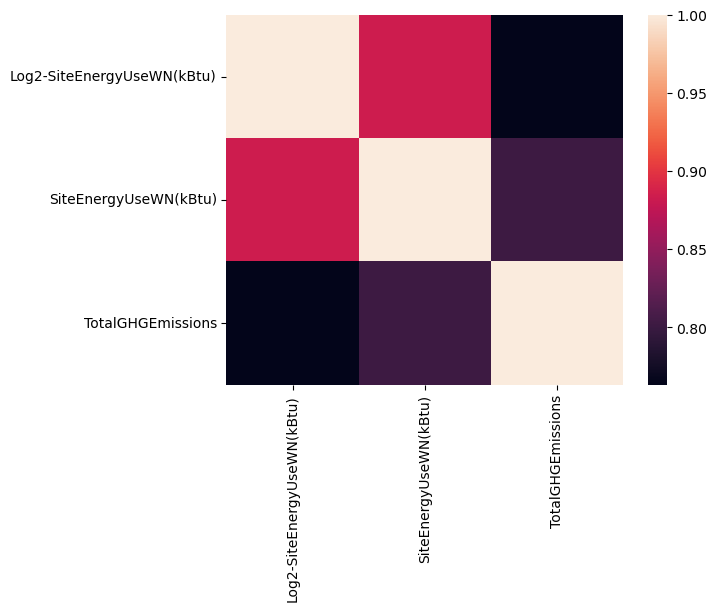

In [37]:
sns.heatmap(y2.corr())

- On observe une corrélation entre les variables d'émissions et de consommation (coefficient de corrélation de 0,85). Voyons maintenant si nous pouvons entraîner un modèle pour estimer les émissions en utilisant les sorties du modèle de prédiction des consommations.

In [38]:
dict_modeles = {'Gradient Boosting Regressor' : gbr_emissions.best_estimator_,}

In [39]:
dict_modeles_new = dict_modeles

In [40]:
# Initialisation du modèle et de la recherche grid
gbr = GradientBoostingRegressor()
gbr_emissions_court = GridSearchCV(estimator=gbr,
                        param_grid=parameters,
                        
                        cv=5, # Nombre de plis dans la validation croisée
                        verbose=2) # Contrôle la quantité d'informations affichées pendant l'exécution

In [41]:
gbr_emissions_court.fit(np.vstack([dict_modeles['Gradient Boosting Regressor'].predict(X_train2), np.ones(X_train2.shape[0])]).T,
                          y_train2)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", gbr_emissions_court.best_params_)

# Meilleur score de performance
print("Meilleur score :", gbr_emissions_court.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=400; total time=   0.4s
[CV] END ...................................n_estimators=400; total time=   0.5s
[CV] END ...................................n_estimators=400; total time=   0.4s
[CV] END ...................................n_estimators=400; total time=   0.4s
[CV] END ...................................n_estimators=400; total time=   0.5s
[CV] END ...................................n_estimators=600; total time=   0.5s
[CV] END ...................................n_es

Calculons la RMSE entre les valeurs prédites par un modèle de régression basé sur le Gradient Boosting et les valeurs réelles d'un ensemble de données de test.

In [42]:
math.sqrt(mean_squared_error(gbr_emissions_court.best_estimator_.predict(
    np.vstack([dict_modeles_new['Gradient Boosting Regressor'].predict(X_test2), np.ones(X_test2.shape[0])]).T),
                             y_test2))

61.27404266458744

- La RMSE est differente à celle du modèle avec toutes les features. Essayons d'ajouter en entrée du modèle de prédiction la prédiction du modèle initial, ainsi que les 5 features importantes du modèle initial, selon la permutation.

In [43]:
columns_feature_emissions = ['LargestPropertyUseTypeGFA','NumberofFloors','YearBuilt','NumberofBuildings','âge']

In [44]:
dict_modeles['Gradient Boosting Regressor'].predict(X_train2).reshape(-1,1).shape

(835, 1)

In [45]:
X_train2[columns_feature_emissions].shape

(835, 5)

In [46]:
# Initialisation du modèle et de la recherche grid
gbr = GradientBoostingRegressor()
gbr_emissions_court2 = GridSearchCV(estimator=gbr,
                        param_grid=parameters,
                        
                        cv=5, # Nombre de plis dans la validation croisée
                        verbose=2) # Contrôle la quantité d'informations affichées pendant l'exécution

In [47]:
gbr_emissions_court2.fit(np.hstack([dict_modeles_new['Gradient Boosting Regressor'].predict(X_train2).reshape(-1,1), X_train2[columns_feature_emissions].to_numpy()]),
                          y_train2)


# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", gbr_emissions_court2.best_params_)

# Meilleur score de performance
print("Meilleur score :", gbr_emissions_court2.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=400; total time=   0.8s
[CV] END ...................................n_estimators=400; total time=   0.7s
[CV] END ...................................n_estimators=400; total time=   0.7s
[CV] END ...................................n_estimators=400; total time=   0.7s
[CV] END ...................................n_estimators=400; total time=   0.6s
[CV] END ...................................n_estimators=600; total time=   0.9s
[CV] END ...................................n_es

In [48]:
math.sqrt(mean_squared_error(gbr_emissions_court2.predict(
    np.hstack([dict_modeles_new['Gradient Boosting Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),y_test2))

54.22858676327091

- Ce résultat est satisfaisant : la RMSE est encore plus faible que pour le modèle initialement entraîné sans prendre en compte la consommation.

 #### Export du modèle

In [49]:
filename = 'models/' + 'gbr_emissions' + '.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(gbr_emissions_court2, filehandler)

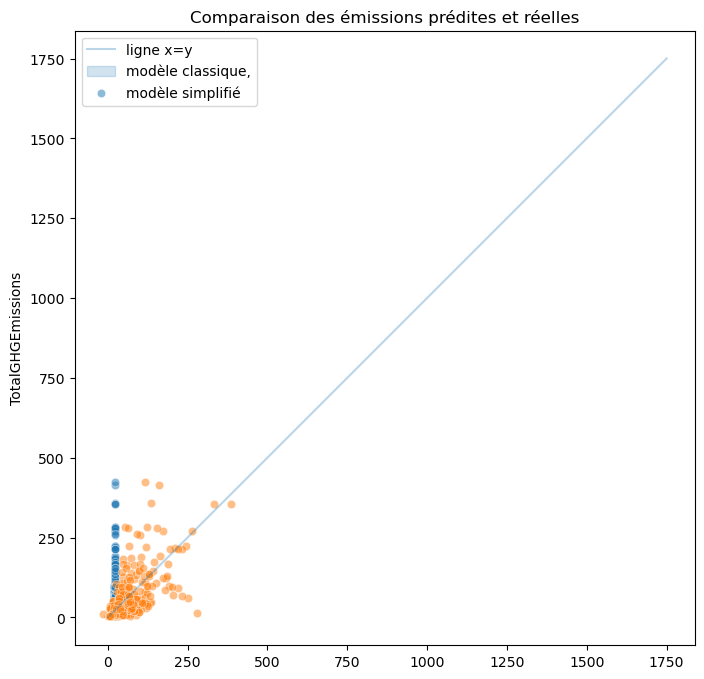

In [50]:
plt.figure(figsize=(8,8))
plt.title('Comparaison des émissions prédites et réelles')
sns.lineplot(x = [0,1750], y = [0,1750], alpha=0.3)
sns.scatterplot(x = model_emissions.predict(X_test2),
                y = y_test2, alpha=0.5)
sns.scatterplot(x = gbr_emissions_court2.predict(np.hstack([dict_modeles['Gradient Boosting Regressor'].predict(X_test2).reshape(-1,1), 
               X_test2[columns_feature_emissions].to_numpy()])),
                y = y_test2, alpha=0.5)
plt.legend(['ligne x=y', 'modèle classique,', 'modèle simplifié'])
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

#### Intérêt du Energy Star Score


- Entraînons un nouveau modèle avec Energy Star Score.

In [51]:
X_en = X.copy()

In [52]:
X_en['energy_star_score'] = energy_star_score

In [53]:
y_en = y['Log2-SiteEnergyUseWN(kBtu)'].copy()
y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [54]:
X_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [55]:
from sklearn.model_selection import train_test_split
X_en_train, X_en_test, y_en_train, y_en_test = \
                        train_test_split(X_en, 
                                         y_en,  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )

In [56]:
# Initialisation du modèle et de la recherche grid
gbr = GradientBoostingRegressor()
model_en = GridSearchCV(estimator=gbr,
                        param_grid=parameters,
                        
                        cv=5, # Nombre de plis dans la validation croisée
                        verbose=2) # Contrôle la quantité d'informations affichées pendant l'exécution

model_en.fit(X_en_train, y_en_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", model_en.best_params_)

# Meilleur score de performance
print("Meilleur score avec Energy Star Score :", model_en.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................................n_estimators=200; total time=   1.5s
[CV] END ...................................n_estimators=200; total time=   2.0s
[CV] END ...................................n_estimators=200; total time=   1.4s
[CV] END ...................................n_estimators=200; total time=   1.5s
[CV] END ...................................n_estimators=200; total time=   1.5s
[CV] END ...................................n_estimators=400; total time=   2.7s
[CV] END ...................................n_estimators=400; total time=   2.7s
[CV] END ...................................n_estimators=400; total time=   2.9s
[CV] END ...................................n_estimators=400; total time=   3.1s
[CV] END ...................................n_estimators=400; total time=   2.5s
[CV] END ...................................n_estimators=600; total time=   4.1s
[CV] END ...................................n_es

In [57]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

0.44226574431257576

- Entraînons un autre modèle avec les mêmes données, mais sans l'Energy Star Score.

In [58]:
X_en_train.drop(['energy_star_score'], axis=1, inplace=True)
X_en_test.drop(['energy_star_score'], axis=1, inplace=True)

In [59]:
# Initialisation du modèle et de la recherche grid
gbr = GradientBoostingRegressor()
model_en = GridSearchCV(estimator=gbr,
                        param_grid=parameters,
                        
                        cv=5, # Nombre de plis dans la validation croisée
                        verbose=2) # Contrôle la quantité d'informations affichées pendant l'exécution

model_en.fit(X_en_train, y_en_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", model_en.best_params_)

# Meilleur score de performance
print("Meilleur score sans Energy Star Score :", model_en.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................................n_estimators=200; total time=   1.2s
[CV] END ...................................n_estimators=200; total time=   1.2s
[CV] END ...................................n_estimators=200; total time=   1.2s
[CV] END ...................................n_estimators=200; total time=   1.2s
[CV] END ...................................n_estimators=200; total time=   1.3s
[CV] END ...................................n_estimators=400; total time=   2.6s
[CV] END ...................................n_estimators=400; total time=   3.0s
[CV] END ...................................n_estimators=400; total time=   2.6s
[CV] END ...................................n_estimators=400; total time=   2.9s
[CV] END ...................................n_estimators=400; total time=   2.6s
[CV] END ...................................n_estimators=600; total time=   3.9s
[CV] END ...................................n_es

In [60]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

0.5801756814779154

#### Conclusion :

 Le résultat obtenu avec le Energy Star Score est relativement proche de celui du modèle initial, mais son impact semble aléatoire; par conséquent, il n'est pas impératif de le conserver.